In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize']=(4,3) 

In [ ]:
titanic_df= pd.read_csv('../data/titanic.csv')
titanic_my= pd.read_csv('../data/titanic.csv')


In [ ]:
titanic_df.info()

In [ ]:
# sns에서 제공하는 titanic 데이터
sns.load_dataset('titanic')

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 :', titanic_df.isnull().sum().sum())

In [ ]:
print('성별 값 분포 :\n', titanic_df['Sex'].value_counts())
print('선실 값 분포 :\n', titanic_df['Cabin'].value_counts())
print(' 값 분포 :\n', titanic_df['Embarked'].value_counts())

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

In [ ]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

In [ ]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly' 
    return cat

In [ ]:
plt.figure(figsize=(10, 6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 
' Student', 'Young Adult', 'Adult', 'Elderly']
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', 
data = titanic_df, order = group_names)

In [ ]:
lb_enc =LabelEncoder()
lb_enc.fit(titanic_df['Sex'])
enc=lb_enc.transform(titanic_df['Sex'])
titanic_df['Sex_enc']=enc

In [ ]:
titanic_df.head()

In [ ]:
lb_enc =OneHotEncoder()
lb_enc.fit(titanic_df[['Sex']])
enc=lb_enc.transform(titanic_df[['Sex']])
enc

In [ ]:
## 희소행렬를 2차원 배열로 변환 -데이터프레임으로 1
pd.DataFrame(enc.toarray(), columns=['female','male'])

## 희소행렬를 2차원 배열로 변환 -데이터프레임으로 2
titanic_df[['female','male']]= enc.toarray()

## concat으로 합치기
pd.concat([titanic_df, pd.DataFrame(enc.toarray(), columns=['female','male'])], axis=1)

In [ ]:
## 희소행렬를 2차원 배열로 변환 -데이터프레임으로 2
titanic_df[['female','male']]= enc.toarray()

In [ ]:
titanic_df.drop(['female','male'], axis=1, inplace=True)

In [ ]:
oh_enc=OneHotEncoder()
result=oh_enc.fit_transform(titanic_df[['Cabin','Embarked']])
print(result.toarray().shape)
result.toarray()

In [ ]:
titanic_df.drop(['Name','Ticket','PassengerId',], axis=1, inplace=True)

In [ ]:
titanic_df.drop(['Embarked'], axis=1, inplace=True)

In [ ]:
category=np.hstack(('cab_'+ oh_enc.categories_[0],'em_'+ oh_enc.categories_[1] ))
# np.vstack 넘파이 배열을 수직으로 붙이기/합치기(np.hstack은 수평으로 붙이기)   # 공부할 것!!

In [ ]:
pd.DataFrame(result.toarray(), columns=category)

In [ ]:
titanic_df=pd.concat([titanic_df, pd.DataFrame(result.toarray(), columns=category)],axis=1)

In [ ]:
titanic_df.head()

In [ ]:
titanic=pd.read_csv('../data/titanic.csv')
titanic.head()

In [ ]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna('N', inplace=True)
titanic['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 :', titanic.isnull().sum().sum())

In [ ]:
titanic['Cabin'] = titanic['Cabin'].str[:1]

In [ ]:
titanic.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

In [ ]:
titanic['Pclass']=titanic['Pclass'].astype('object')
titanic_f=pd.get_dummies(titanic)
titanic_f

In [ ]:
titanic_d.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
result=scaler.fit_transform(titanic_d[['Age','SibSp', 'Parch', 'Fare']])
titanic_d[['Age','SibSp', 'Parch', 'Fare']]=result
titanic_d[['Age','SibSp', 'Parch', 'Fare']].describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
result=scaler.fit_transform(titanic_d[['Age','SibSp', 'Parch', 'Fare']])
titanic_d[['Age','SibSp', 'Parch', 'Fare']]=result
titanic_d[['Age','SibSp', 'Parch', 'Fare']].describe()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
result=scaler.fit_transform(titanic_f[['Age','SibSp', 'Parch', 'Fare']])
titanic_f[['Age','SibSp', 'Parch', 'Fare']]=result
titanic_f[['Age','SibSp', 'Parch', 'Fare']].describe()

In [ ]:
## 이상치 제거

plt.figure(figsize=(10,6))
sns.histplot(data=titanic_d[titanic_d['Fare'] <=2.5], x='Fare', color='red')
sns.histplot(data=titanic_d[titanic_d['Age'] <=2.5], x='Age', color='blue')
sns.histplot(data=titanic_d[titanic_d['Parch'] <=2.5], x='Parch', color='y')
# 이상치 z_score 2.5 이상

In [ ]:
sns.histplot(data=titanic_f, x='Fare', color='blue')

In [ ]:
y=titanic_d['Survived']
X=titanic_d.iloc[:,1:]

X_train, X_test, y_train, y_test =train_test_split(X, y,test_size = 0.2, random_state = 11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
print(accuracy_score(y_test, pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver='liblinear')

In [ ]:
# DecisionTreeClassfier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
acc = accuracy_score(y_test, dt_pred)
print(f'DesitionTree 정확도 : {acc:.4f}' )

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test, rf_pred)
print(f'RandomForest 정확도 : {acc:.4f}')

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
acc = accuracy_score(y_test, lr_pred)
print(f'Logistic 정확도 : {acc:.4f}' )

In [ ]:
# 일반화 K-fold 교차검증
from sklearn.model_selection import cross_val_score

def exec_cvs(clf, folds = 5):
    scores = cross_val_score(clf, X_train, y_train, cv = folds)
    for iter_count, accuracy in enumerate(scores):
           print(f"교차 검증 {iter_count} 정확도 : {accuracy:.4f}")
    print(f'평균 정확도 : {np.mean(scores):.4f}')

df_clf = DecisionTreeClassifier(random_state = 11)
exec_kfold(dt_clf)
rf_clf = RandomForestClassifier(random_state = 11)
exec_kfold(rf_clf)
lr_clf = LogisticRegression(solver='liblinear')
exec_kfold(lr_clf)


In [ ]:
from sklearn.model_selection import KFold
# 교차검증 함수 생성
def exec_kfold(clf, X_train, y_train, folds = 5):
    kfold = KFold(n_splits = 5)
    scores = []
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_train)):
        X_train_f, X_val_f = X_train.iloc[train_index],X_train.iloc[test_index]
        y_train_f, y_val_f = y_train.iloc[train_index],y_train.iloc[test_index] 
        clf.fit(X_train_f, y_train_f)
        predictions = clf.predict(X_val_f)
        accuracy = accuracy_score(y_val_f, predictions)
        scores.append(accuracy)
        print(f"교차 검증 {iter_count} 정확도 : {accuracy:.4f}")
    mean_score = np.mean(scores)
    print(f'평균 정확도 : {mean_score:.4f}')
    return clf

In [ ]:
df_clf= DecisionTreeClassifier(random_state = 11)
scores = cross_val_score(df_clf, X_train, y_train, cv =7)
print(np.mean(scores))
print(np.round(scores,4))

In [ ]:
rf_clf= RandomForestClassifier(random_state = 11)
scores = cross_val_score(rf_clf, X_train, y_train, cv =7)
print(np.mean(scores))
print(np.round(scores,4))

In [ ]:
lr_clf= LogisticRegression(solver='liblinear')
scores = cross_val_score(lr_clf, X_train, y_train, cv =7)
print(np.mean(scores))
print(np.round(scores,4))

In [ ]:
kfold= KFold(n_splits=5)
acc=[]
dt_clf= DecisionTreeClassifier(random_state=11)
for train_index, test_index in kfold.split(X):
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]

    dt_clf.fit(X_train, y_train)
    pred= dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    acc.append(accuracy)
    print(np.mean(accuracy))


### 머신러닝 분류분석 모델의 예측성능 평가

In [ ]:
oh_enc=OneHotEncoder()
result=oh_enc.fit_transform(titanic[['Cabin','Embarked']])
print(result.toarray().shape)
result.toarray()

In [ ]:
category=np.hstack(('cab_'+ oh_enc.categories_[0],'em_'+ oh_enc.categories_[1] ))
# np.vstack 넘파이 배열을 수직으로 붙이기/합치기(np.hstack은 수평으로 붙이기)   # 공부할 것

In [ ]:
pd.DataFrame(result.toarray(), columns=category)

In [ ]:
titanic_df=pd.concat([titanic_df, pd.DataFrame(result.toarray(), columns=category)],axis=1)

In [ ]:
titanic_df

In [266]:
y=titanic_df['Survived']
X=titanic_df.iloc[:,1:]

X_train, X_test, y_train, y_test =train_test_split(X, y,test_size = 0.2, random_state = 11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 21) (179, 21) (712,) (179,)


In [267]:
# 정확도 왜곡 실습  // 정확도 성능 별로다 ^^
from sklearn.base import BaseEstimator

beas=BaseEstimator()

In [283]:
## 공부할 것

class MyDummyClassifier(BaseEstimator):   # 상속할 class 속성 가져오는 방법 class()에 넣음
    def fit(self, X, y = None):           # fit 해야하므로 그냥 넣어놓음
        pass                              # 남성이면 사망, 여성 생존 -- 메서드 
    def predict(self, X):                 # X_test 받으므로 X로
        pred = np.zeros((X.shape[0], 1))  # 모두 o으로 되어있는 pred 배열 만듦  // X.shape[0]은 row의 갯수임
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 'male':
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [284]:
model= MyDummyClassifier()
model.fit(X_train, y_train)
pred=model.predict(X_test)
acc=accuracy_score(y_test, pred)
print('정확도 :', acc)

정확도 : 0.8324022346368715


In [297]:
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros( (len(X), 1))
fakeclf=MyFakeClassifier()

In [291]:
from sklearn.datasets import load_digits  
digits = load_digits()       # 이미지파일: 플래툰된, 숫자화,  10개의 범주로 됨 
print(digits.data)
print(digits.data.shape)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[0 1 2 ... 8 9 8]


In [292]:
# 번호가 7이면 True==1, 그 외는 False==0
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [301]:
pred=fakeclf.predict(digits.data)
accuracy_score(y,pred)

0.9003895381190874

In [303]:
print(pd.Series(y).value_counts())

0    1618
1     179
Name: count, dtype: int64


<Axes: ylabel='count'>

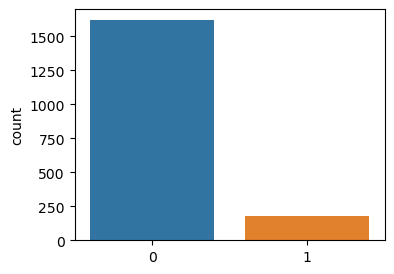

In [307]:
sns.countplot(x=y)

<Axes: ylabel='count'>

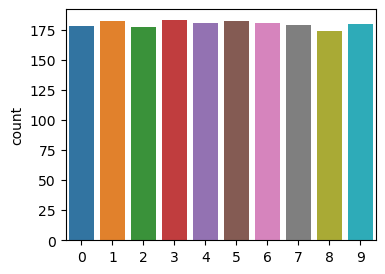

In [306]:
sns.countplot(x=digits.target)